# Experiments

This notebook documents the use of the Experiment class for running many experiments, and comparing the results.

In [1]:
from conx import Network, Experiment

Using Theano backend.
conx, version 3.4.3


First, we create an experiment object:

In [2]:
exp = Experiment("XOR-Test1")

Experiment takes a function, and any number of variations of values.

The function takes whatever argumnets you wish, creates a network, trains it, and returns the network and a category describing the run:

In [3]:
def function(optimizer, activation, **options):
    net = Network("XOR", 2, 2, 1, activation=activation)
    net.compile(error="mse", optimizer=optimizer)
    net.dataset.add_by_function(2, (0, 4), "binary", lambda i,v: [int(sum(v) == len(v))])
    net.train(report_rate=10000, verbose=0, **options)
    category = "%s-%s" % (optimizer, activation)
    return category, net

Then we run a number of trials (perhaps just 1). Notice that each argument should be given as a list. The total number of runs per trial is the product of the lengths of the arguments.

In [4]:
exp.run(function,
        trials=2,
        epochs=[1000],
        accuracy=[0.8],
        tolerance=[0.2],
        optimizer=["adam", "sgd"],
        activation=["sigmoid", "relu"],
        dir="/tmp/")

The results is a list of (category, network-name) pairs:

In [5]:
exp.results

[('adam-sigmoid', '/tmp/XOR-Test1-00001-00001'),
 ('sgd-sigmoid', '/tmp/XOR-Test1-00001-00002'),
 ('adam-relu', '/tmp/XOR-Test1-00001-00003'),
 ('sgd-relu', '/tmp/XOR-Test1-00001-00004'),
 ('adam-sigmoid', '/tmp/XOR-Test1-00002-00001'),
 ('sgd-sigmoid', '/tmp/XOR-Test1-00002-00002'),
 ('adam-relu', '/tmp/XOR-Test1-00002-00003'),
 ('sgd-relu', '/tmp/XOR-Test1-00002-00004')]

Often, you may wish to plot the results of learning. This may take some time, as the function will re-load each network:

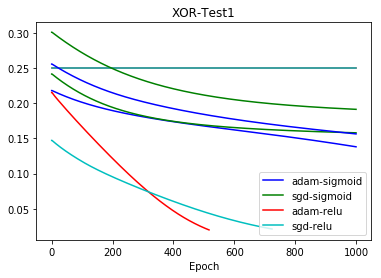

In [6]:
exp.plot("loss")

Notice that each category has its own color.

There is also a generic apply method for calling a function with each of the (category, network-names). Ususally, you would probably want to re-load the network, and perform some operation in the function.

In [7]:
exp.apply(lambda category, exp_name: (category, exp_name))

[('adam-sigmoid', '/tmp/XOR-Test1-00001-00001'),
 ('sgd-sigmoid', '/tmp/XOR-Test1-00001-00002'),
 ('adam-relu', '/tmp/XOR-Test1-00001-00003'),
 ('sgd-relu', '/tmp/XOR-Test1-00001-00004'),
 ('adam-sigmoid', '/tmp/XOR-Test1-00002-00001'),
 ('sgd-sigmoid', '/tmp/XOR-Test1-00002-00002'),
 ('adam-relu', '/tmp/XOR-Test1-00002-00003'),
 ('sgd-relu', '/tmp/XOR-Test1-00002-00004')]